In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [614]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [615]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

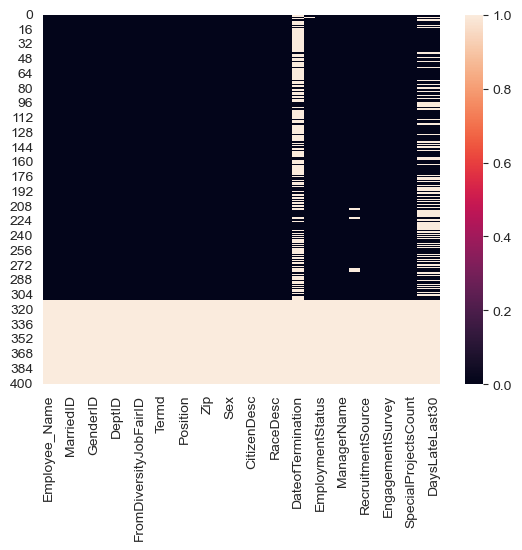

In [616]:
sns.heatmap(df.isnull())

In [617]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']]

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
...,...,...,...
305,NaT,2052-01-18,2014-11-10
306,NaT,1986-04-23,2014-11-10
307,NaT,1983-02-09,2016-06-30
308,NaT,2065-09-09,2014-11-10


### Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [618]:
sns.set_style('darkgrid')

In [619]:
manager = df[['ManagerName', 'ManagerID', 'PerformanceScore']]
def score(x):
    SCORE = {
        'Exceeds': 5,
        'Fully Meets': 4,
        'Partially Meets': 3,
        'Needs Improvement': 2,
        'PIP': 1
        
    }
    return SCORE[x]
manager['PerformanceScore'] = manager['PerformanceScore'].apply(lambda x: score(x))
display(manager)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9116\1172447271.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager['PerformanceScore'] = manager['PerformanceScore'].apply(lambda x: score(x))


,ManagerName,ManagerID,PerformanceScore
0,Brandon R. LeBlanc,1.0,4
1,Brandon R. LeBlanc,1.0,4
2,Brandon R. LeBlanc,1.0,4
3,Brandon R. LeBlanc,1.0,4
4,Brandon R. LeBlanc,1.0,4
...,...,...,...
305,Peter Monroe,7.0,4
306,Peter Monroe,7.0,4
307,Peter Monroe,7.0,4
308,Peter Monroe,7.0,4


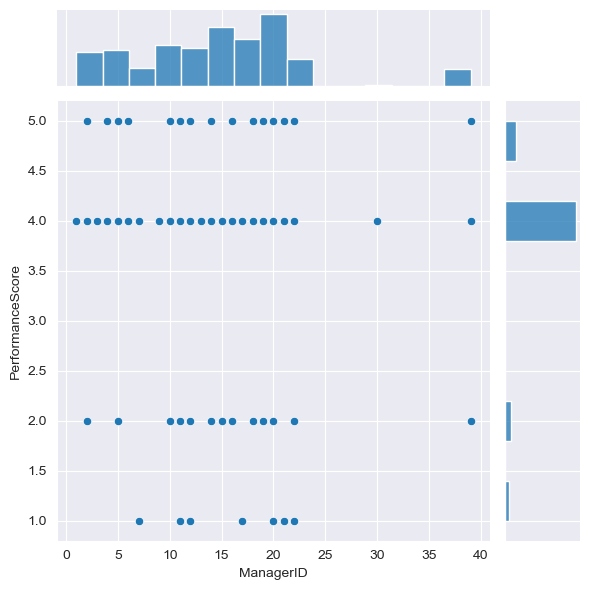

In [620]:
sns.jointplot(x='ManagerID',y='PerformanceScore',data=manager)
plt.show()

In [621]:
manager = manager.pivot_table(values=('ManagerID','PerformanceScore'), index='ManagerName', aggfunc='mean')

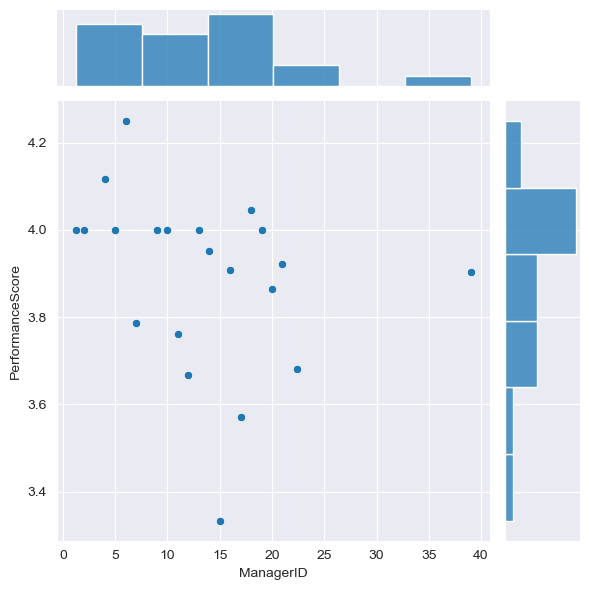

In [622]:
sns.jointplot(x='ManagerID',y='PerformanceScore',data=manager)
plt.show()

### Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [623]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [624]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df['Employees'] = 1

In [625]:
df_rs = df[['RecruitmentSource','Seniority', 'Employees']]
df_rs = df_rs.pivot_table(values=('Seniority', 'Employees'), index='RecruitmentSource', aggfunc={'Seniority' : 'mean', 'Employees' : 'sum'})
df_rs['Recruitment_Source'] = df_rs.index
df_rs.head()

,Employees,Seniority,Recruitment_Source
RecruitmentSource,,,
Billboard,16,5.862886,Billboard
Careerbuilder,1,8.482036,Careerbuilder
Company Intranet - Partner,1,1.215631,Company Intranet - Partner
Diversity Job Fair,29,4.492339,Diversity Job Fair
Employee Referral,31,5.026002,Employee Referral


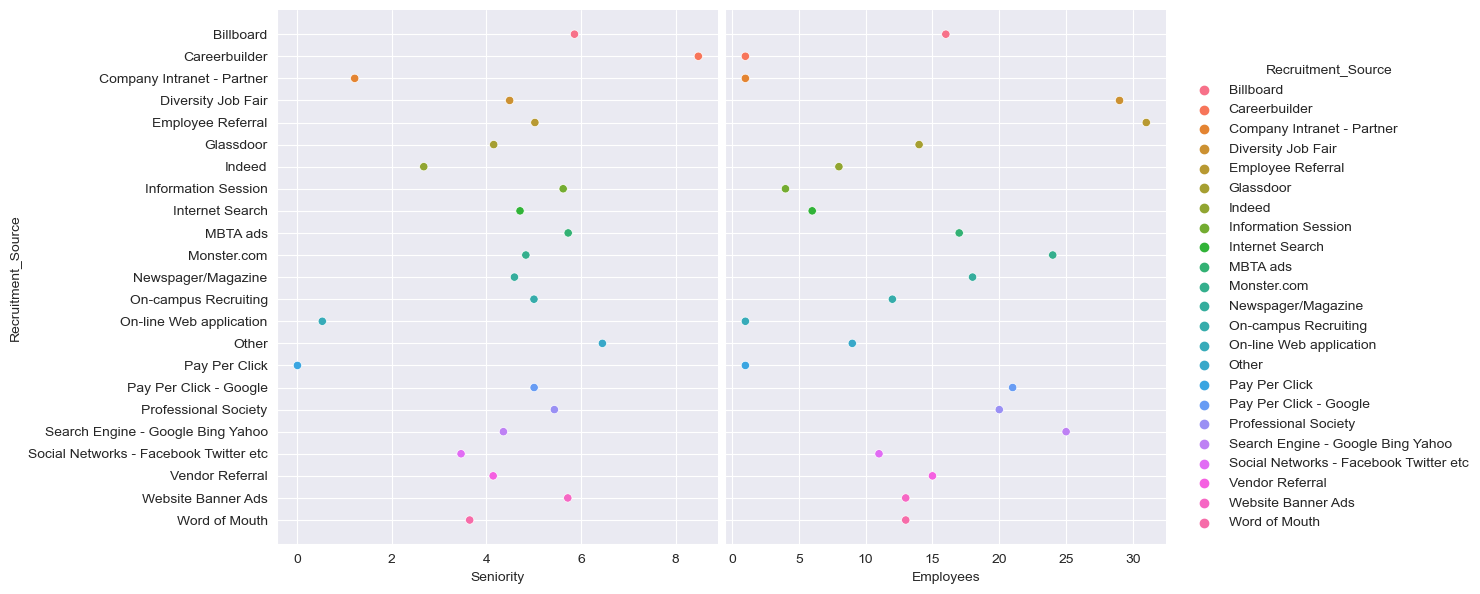

In [626]:
sns.pairplot(df_rs, hue='Recruitment_Source', x_vars=['Seniority', 'Employees'], y_vars=['Recruitment_Source'], height=6)

### Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

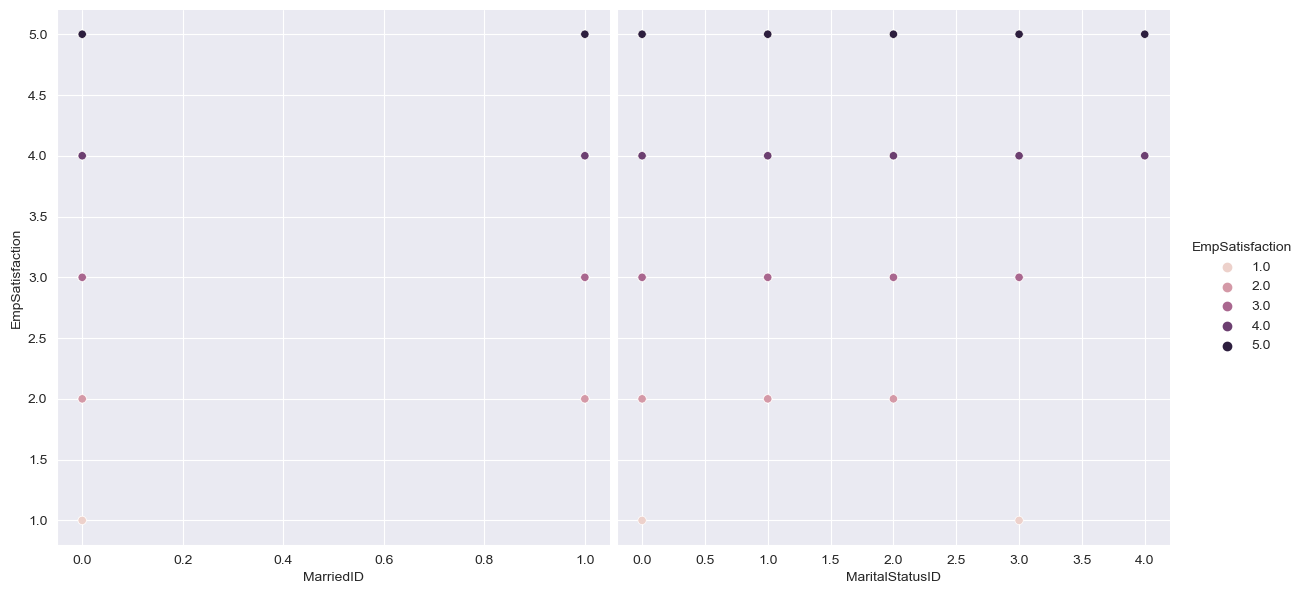

In [627]:
sns.pairplot(df, hue='EmpSatisfaction', x_vars=['MarriedID','MaritalStatusID'], y_vars=['EmpSatisfaction'], height=6)

<AxesSubplot:>

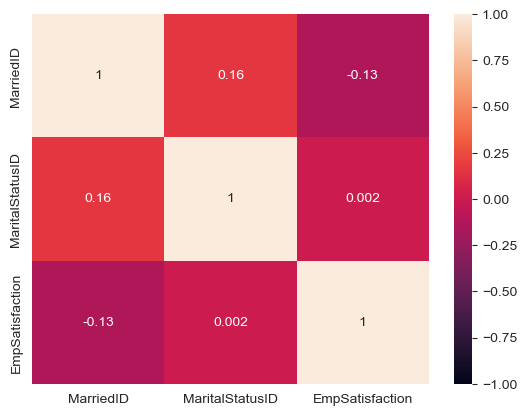

In [628]:
sns.heatmap(df[['MarriedID','MaritalStatusID', 'EmpSatisfaction']].corr(), vmin=-1, vmax=1, annot=True)

### Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [629]:
df['DOB'].sort_values()

13    1969-02-09
10    1969-02-24
72    1969-03-31
232   1969-09-08
108   1969-09-29
         ...    
160   2068-06-06
61    2068-07-06
115   2068-07-20
146   2068-08-15
74    2068-10-10
Name: DOB, Length: 310, dtype: datetime64[ns]

<AxesSubplot:xlabel='Age', ylabel='Department'>

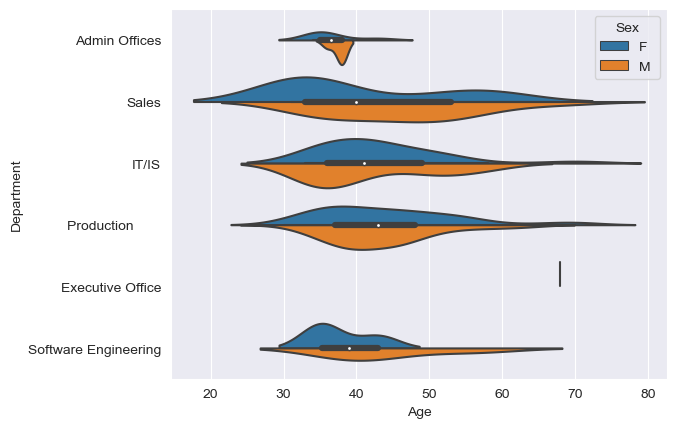

In [630]:
def calculate_age(born):
    today = dt.date.today()
    born_y = born.year
    if born_y > today.year:
        born_y = born_y - 100        
    return today.year - born_y - ((today.month, today.day) < (born.month, born.day))

df['Age'] = df['DOB'].apply(calculate_age)
df_employed = df.drop(df[df['Termd'] == 1].index)
sns.violinplot(x='Age',y='Department',data=df,hue='Sex',split=True)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

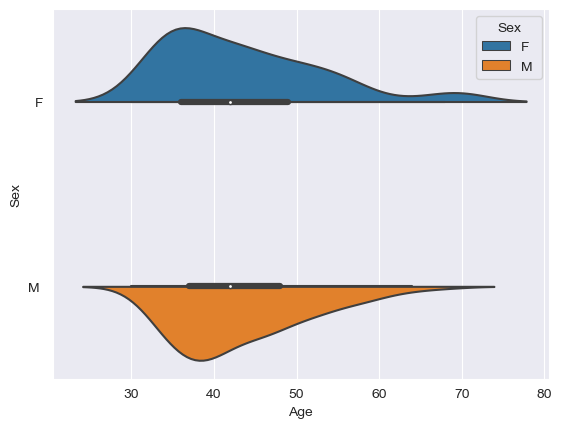

In [631]:
sns.violinplot(x='Age',y='Sex',data=df,hue='Sex',split=True)

### Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

<AxesSubplot:>

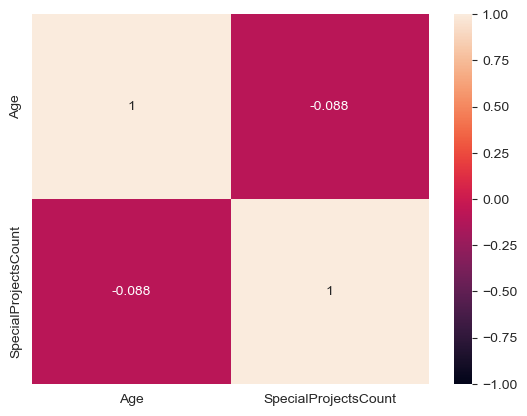

In [632]:
sns.heatmap(df[['Age', 'SpecialProjectsCount']].corr(), vmin=-1, vmax=1, annot=True)

In [633]:
df['Age'].median()

42.0

In [634]:
df['Age'].mean()

43.41935483870968

In [635]:
df_sp = df[['Age', 'SpecialProjectsCount']]

df_sp['Older'] = df_sp['Age'].apply(lambda x: 1 if x > df['Age'].median() else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9116\1925248207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Older'] = df_sp['Age'].apply(lambda x: 1 if x > df['Age'].median() else 0)


In [636]:
younger_workers = df_sp[df_sp['Older'] == 1]['Older'].count()

In [637]:
older_workers = df_sp[df_sp['Older'] == 0]['Older'].count()

<AxesSubplot:xlabel='SpecialProjectsCount', ylabel='Age'>

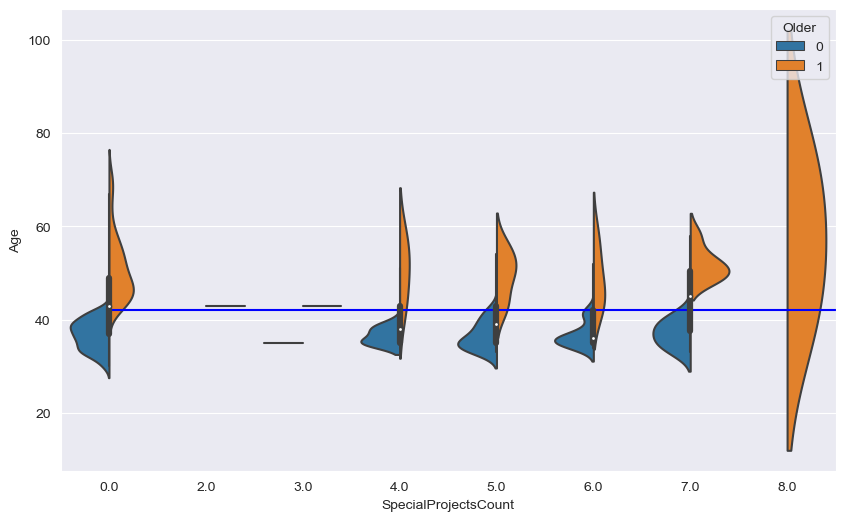

In [638]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0,8], [df['Age'].median(),df['Age'].median()], color='blue')
sns.violinplot(x='SpecialProjectsCount', y='Age', data=df_sp, hue='Older', split=True, height=6)

<AxesSubplot:xlabel='SpecialProjectsCount', ylabel='Age'>

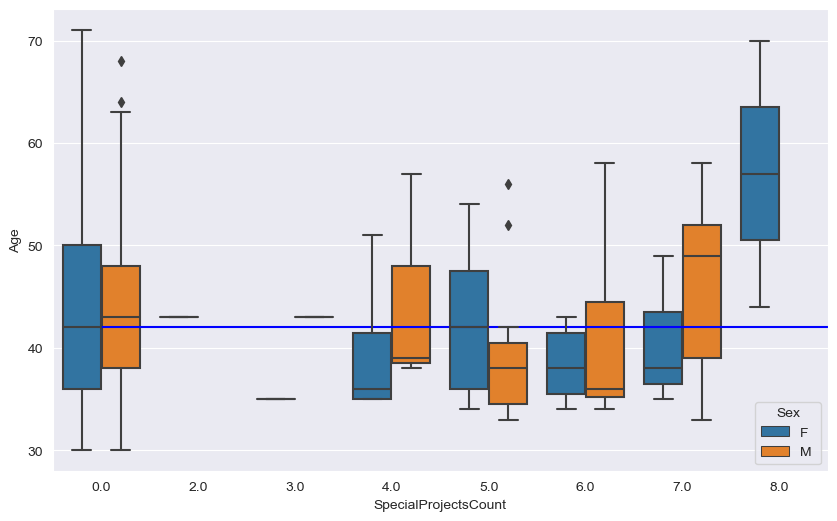

In [639]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0,8], [df['Age'].median(),df['Age'].median()], color='blue')
sns.boxplot(x='SpecialProjectsCount',y='Age',data=df,hue='Sex')


In [640]:
df_sp = df_sp.groupby('Older').agg({'Age': 'mean', 'SpecialProjectsCount':'sum'})
df_sp['Number_of_workers'] = 0
df_sp['Number_of_workers'].loc[0] = younger_workers
df_sp['Number_of_workers'].loc[1] = older_workers
df_sp

C:\Users\Admin\AppData\Local\Temp\ipykernel_9116\3226048617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Number_of_workers'].loc[0] = younger_workers
C:\Users\Admin\AppData\Local\Temp\ipykernel_9116\3226048617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Number_of_workers'].loc[1] = older_workers


,Age,SpecialProjectsCount,Number_of_workers
Older,,,
0,36.699387,235.0,147
1,50.870748,140.0,163


In [641]:
def avg(row):
    x = row[1] / row[2]
    return x

df_sp['Avg_project_count'] = df_sp.apply(lambda row: avg(row), axis=1)

<AxesSubplot:xlabel='Age', ylabel='SpecialProjectsCount'>

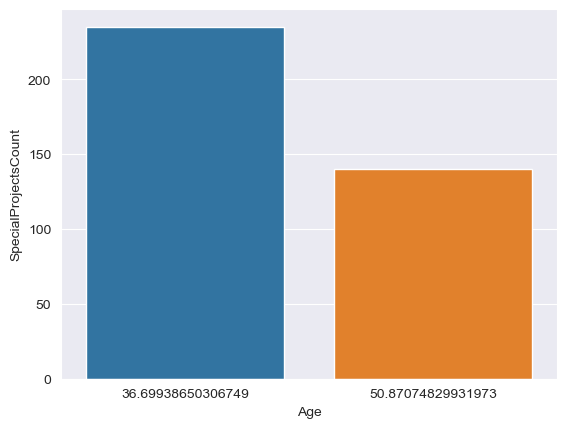

In [642]:
sns.barplot(x='Age', y='SpecialProjectsCount', data=df_sp)

In [643]:
df_sp

,Age,SpecialProjectsCount,Number_of_workers,Avg_project_count
Older,,,,
0,36.699387,235.0,147,1.598639
1,50.870748,140.0,163,0.858896
